In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from astropy.stats import bootstrap
from astropy.utils import NumpyRNGContext

In [2]:
import numpy as np

def bootstrap(data, n=1000, func=np.mean):
    """
    Generate `n` bootstrap samples, evaluating `func`
    at each resampling. `bootstrap` returns a function,
    which can be called to obtain confidence intervals
    of interest.
    """
    simulations = list()
    sample_size = len(data)
    xbar_init = np.mean(data)
    for c in range(n):
        itersample = np.random.choice(data, size=sample_size, replace=True)
        simulations.append(func(itersample))
    simulations.sort()
    def ci(p):
        """
        Return 2-sided symmetric confidence interval specified
        by p.
        """
        u_pval = (1+p)/2.
        l_pval = (1-u_pval)
        l_indx = int(np.floor(n*l_pval))
        u_indx = int(np.floor(n*u_pval))
        return(simulations[l_indx],simulations[u_indx])
    return(ci)

In [76]:
x10.shape

(1, 1125)

In [94]:
boot = bootstrap(x10)

In [95]:
boot(.95)

(0.1582036055281677, 0.19598609668833397)

In [89]:
boot(.95)

(0.11222985550692217, 0.13685138922985932)

In [90]:
np.mean(x11)

0.1242725577637009

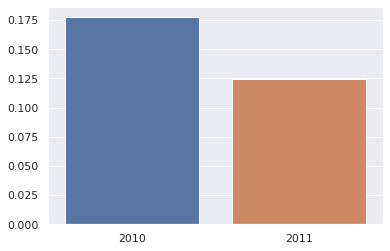

In [92]:
sns.barplot(x=[2010, 2011], y=[0.17737798360866244, 0.1242725577637009], )

In [101]:
y = [np.mean(x10), np.mean(x11)]
x = [2010, 2011]
dyu = [0.19598609668833397, 0.13685138922985932]
dyd = [0.1582036055281677, 0.11222985550692217]

In [104]:
np.mean(boot(.95))

0.17709485110825085

In [105]:
np.mean(x10)

0.17737798360866244

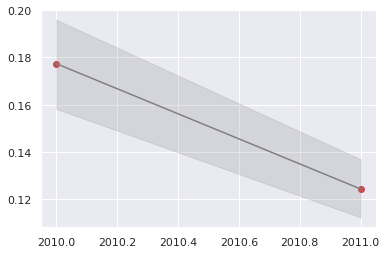

In [102]:
plt.plot(x, y, 'or')
plt.plot(x, y, '-', color='gray')

plt.fill_between(x, dyd, dyu,
                 color='gray', alpha=0.2)

In [2]:
y = [i for i in range(2007, 2020)]
x = []
for i in y:
    with open(f"Alt-right_pol_{i}", "rb") as fp:
        x1 = pickle.load(fp)
    x.append(np.array(x1))
x=np.array(x)

In [28]:
x_mean = []
dyu = []
dyd = []
for i in x:
    x_mean.append(np.mean(i))
    boot = bootstrap(i)
    c = boot(.95)
    print(c)
    dyd.append(c[0])
    dyu.append(c[1])

(0.13961186630829486, 0.3042775285401516)
(0.146802006523569, 0.23900987163299667)
(0.18958086771205782, 0.26152458779243315)
(0.15772980956989743, 0.19562112939957849)
(0.11241384404420736, 0.13618042850707857)
(0.08833431351338139, 0.10155492675700296)
(0.09282569436909391, 0.10311269915709798)
(0.09693920359572598, 0.10458473467852293)
(0.1475904397207957, 0.15630032415634712)
(0.1188422137511128, 0.12435591957706275)
(0.07664806645540527, 0.07901772661145216)
(0.061647523147140865, 0.06263056354909345)
(0.04863680855420534, 0.05009754525741761)


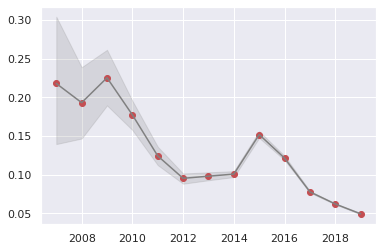

In [29]:
plt.plot(y, x_mean, 'or')
plt.plot(y, x_mean, '-', color='gray')

plt.fill_between(y, dyd, dyu,
                 color='gray', alpha=0.2)

In [30]:
!mkdir bootstrap

In [35]:
import pandas as pd
df = pd.DataFrame({"x":y, "y":x_mean, "dyd":dyd, "dyu":dyu})
df.to_csv("./bootstrap/Alt-right_pol.csv")

In [31]:
with open(f'empath2.pickle', 'wb') as handle:
    pickle.dump(d, handle, protocol=pickle.HIGHEST_PROTOCOL)

Alt-right.pickle		 left-center_pol_2007
Alt-right_pol_2007		 left-center_pol_2008
Alt-right_pol_2008		 left-center_pol_2009
Alt-right_pol_2009		 left-center_pol_2010
Alt-right_pol_2010		 left-center_pol_2011
Alt-right_pol_2011		 left-center_pol_2012
Alt-right_pol_2012		 left-center_pol_2013
Alt-right_pol_2013		 left-center_pol_2014
Alt-right_pol_2014		 left-center_pol_2015
Alt-right_pol_2015		 left-center_pol_2016
Alt-right_pol_2016		 left-center_pol_2017
Alt-right_pol_2017		 left-center_pol_2018
Alt-right_pol_2018		 left-center_pol_2019
Alt-right_pol_2019		 left-center_subj_2007
Alt-right_subj_2007		 left-center_subj_2008
Alt-right_subj_2008		 left-center_subj_2009
Alt-right_subj_2009		 left-center_subj_2010
Alt-right_subj_2010		 left-center_subj_2011
Alt-right_subj_2011		 left-center_subj_2012
Alt-right_subj_2012		 left-center_subj_2013
Alt-right_subj_2013		 left-center_subj_2014
Alt-right_subj_2014		 left-center_subj_2015
Alt-right_subj_2015		 left-center_subj_2016
Alt-right_subj_20

In [32]:
x_mean

[0.21795042831757733,
 0.19315777928090427,
 0.2253778951182301,
 0.17737798360866244,
 0.1242725577637009,
 0.0953213129978638,
 0.09806336713493609,
 0.1008032267522849,
 0.1518719450380966,
 0.12144090838168525,
 0.07779045397301013,
 0.06213618731185533,
 0.04938904374354701]

In [52]:
names = ["IDW"]
cat = ["subj"]
for blob in cat:
    for name in names:
        print(name, blob)
        x = []
        y = []
        for year in range(2007, 2020):
            try:
                with open(f"{name}_{blob}_{year}", "rb") as fp:
                    y1 = pickle.load(fp)
                    x.append(year)
            except:
                continue
            y.append(np.array(y1))
        y=np.array(y)

        y_mean = []
        dyu = []
        dyd = []
        for i in y:
            y_mean.append(np.mean(i))
            boot = bootstrap(i)
            c = boot(.95)
            print(c)
            dyd.append(c[0])
            dyu.append(c[1])

        df = pd.DataFrame({"x":x, "y":y_mean, "dyd":dyd, "dyu":dyu})
        df.to_csv(f"./bootstrap/{name}_{blob}.csv")

IDW subj
(0.34789574748306806, 0.4201359947940889)
(0.4357160061996161, 0.45590770440205747)
(0.4410767849298908, 0.45399010559833625)
(0.4521992571455735, 0.4594122220771495)
(0.44567717037032106, 0.45095374529562116)
(0.43823178831391035, 0.44138692633896653)
(0.4405716516680642, 0.44334989842341743)
(0.43921530231582495, 0.44207003768818653)
(0.4546636935453105, 0.45687508187179154)
(0.44221724763841563, 0.4436465549921456)
(0.4280062036252115, 0.4290213581650164)
(0.41256528080779586, 0.4130398869653578)
(0.403016915610075, 0.40360570613829116)


In [51]:
pd.read_csv(f"./bootstrap/IDW_subj.csv")

,Unnamed: 0,x,y,dyd,dyu


In [50]:
!ls bootstrap/

Alt-right_pol.csv   IDW_pol.csv		  left_pol.csv		 right_pol.csv
Alt-right_subj.csv  IDW_subj.csv	  left_subj.csv		 right_subj.csv
center_pol.csv	    left-center_pol.csv   right-center_pol.csv
center_subj.csv     left-center_subj.csv  right-center_subj.csv


In [3]:
names = ["Alt-right", "right-center", "center", "left", "left-center", "right", "IDW"]
pol = []
subj = []
for name in names:
    pol.append(pd.read_csv(f"./bootstrap/{name}_pol.csv"))
    subj.append(pd.read_csv(f"./bootstrap/{name}_subj.csv"))
    

In [54]:
subj[6]

,Unnamed: 0,x,y,dyd,dyu
0,0,2007,0.384484,0.347896,0.420136
1,1,2008,0.445891,0.435716,0.455908
2,2,2009,0.447288,0.441077,0.453990
3,3,2010,0.455735,0.452199,0.459412
4,4,2011,0.448390,0.445677,0.450954
5,5,2012,0.439740,0.438232,0.441387
6,6,2013,0.442003,0.440572,0.443350
7,7,2014,0.440658,0.439215,0.442070
8,8,2015,0.455758,0.454664,0.456875
9,9,2016,0.442939,0.442217,0.443647


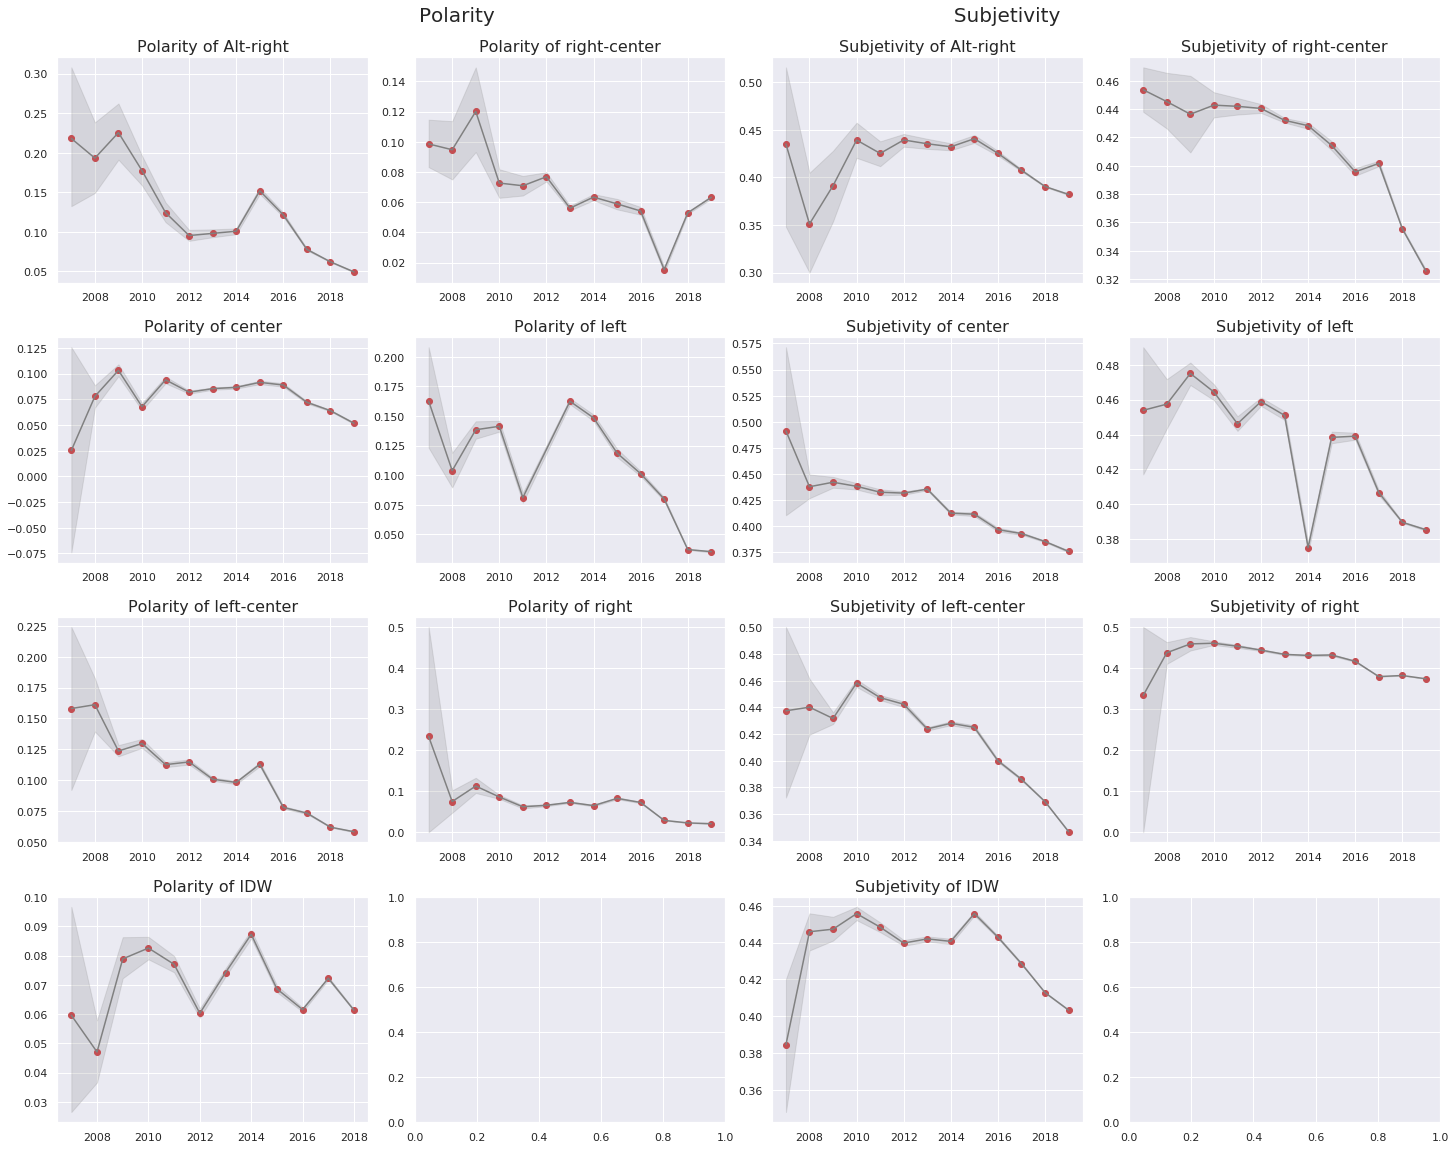

In [80]:
fig, ax = plt.subplots(4, 4, figsize=[20, 10],  squeeze=False)
fig.tight_layout()
plt.subplots_adjust(bottom=-0.5)
space = ' '
plt.suptitle(f"Polarity {70*space} Subjetivity", fontsize=20, y=1.05)
for i in range(len(pol)):
    ax[i//2, i%2].set_title(f"Polarity of {names[i]}", fontsize=16)
    ax[i//2, i%2].plot(pol[i].x, pol[i].y, 'or')
    ax[i//2, i%2].plot(pol[i].x, pol[i].y, '-', color='gray')

    ax[i//2, i%2].fill_between(pol[i].x, pol[i].dyd, pol[i].dyu,
                     color='gray', alpha=0.2)
    
for i in range(len(subj)):
    ax[i//2, 2+i%2].set_title(f"Subjetivity of {names[i]}", fontsize=16)
    ax[i//2, 2+i%2].plot(subj[i].x, subj[i].y, 'or')
    ax[i//2, 2+i%2].plot(subj[i].x, subj[i].y, '-', color='gray')

    ax[i//2, 2+i%2].fill_between(subj[i].x, subj[i].dyd, subj[i].dyu,
                     color='gray', alpha=0.2)

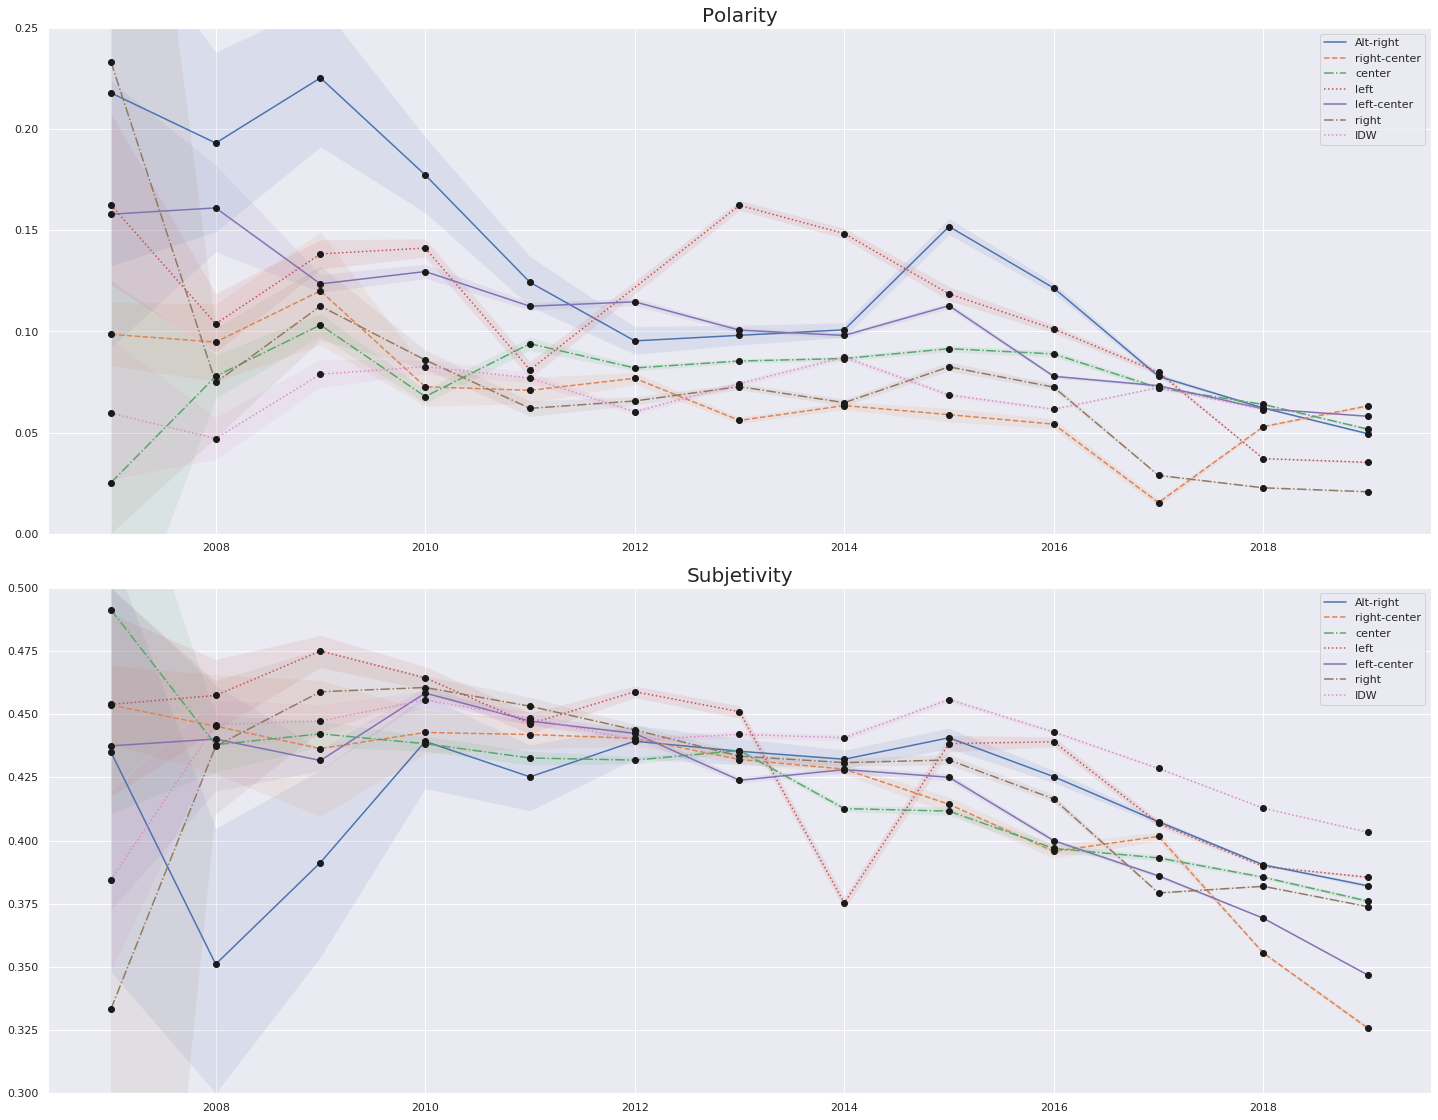

In [7]:
fig, ax = plt.subplots(2, 1, figsize=[20, 10],  squeeze=False)
fig.tight_layout()
plt.subplots_adjust(bottom=-0.5)
space = ' '
#plt.suptitle(f"Polarity {70*space} Subjetivity", fontsize=20, y=1.05)
ax[0, 0].set_title("Polarity", fontsize=20)
ax[0, 0].set_ylim([0.,0.25])
for i in range(len(pol)):
    ax[0, 0].plot(pol[i].x, pol[i].y, lines[i], color="")
ax[0, 0].legend(names)
for i in range(len(pol)):
    ax[0, 0].plot(pol[i].x, pol[i].y, 'ok')
    ax[0, 0].fill_between(pol[i].x, pol[i].dyd, pol[i].dyu, alpha=0.1)

ax[1, 0].set_title("Subjetivity", fontsize=20)
ax[1, 0].set_ylim([0.3,0.5])
for i in range(len(subj)):
    ax[1, 0].plot(subj[i].x, subj[i].y, lines[i])
ax[1, 0].legend(names)
for i in range(len(subj)):
    ax[1, 0].plot(subj[i].x, subj[i].y, 'ok')
    ax[1, 0].fill_between(subj[i].x, subj[i].dyd, subj[i].dyu, alpha=0.1)
    

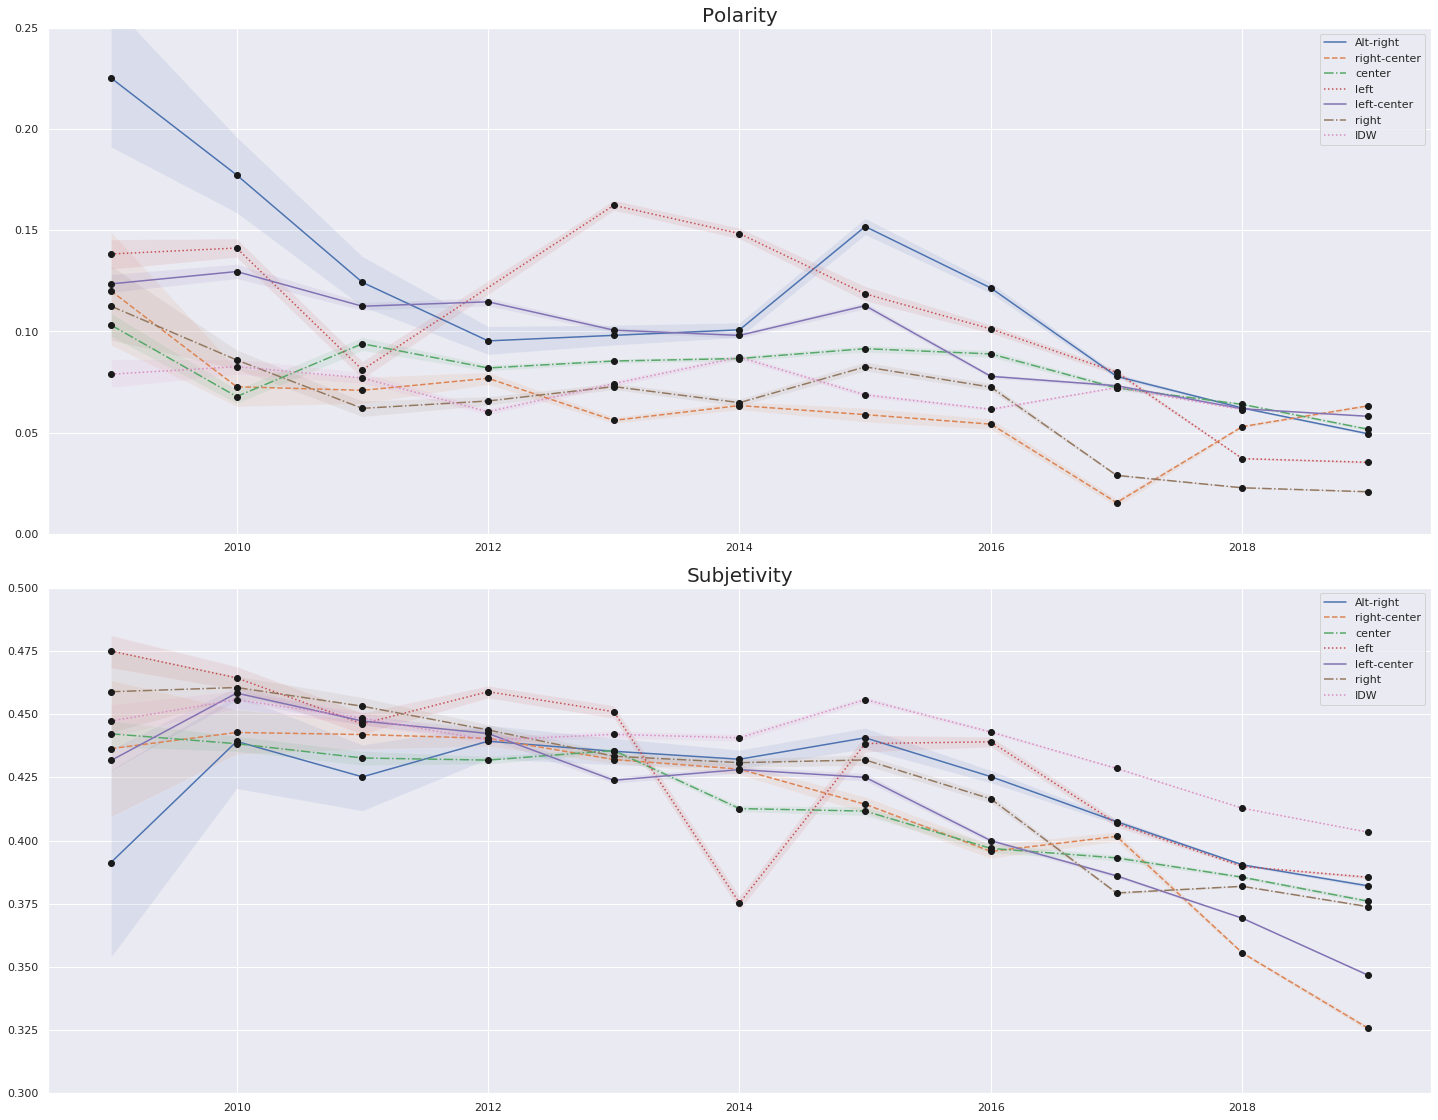

In [11]:
fig, ax = plt.subplots(2, 1, figsize=[20, 10],  squeeze=False)
fig.tight_layout()
plt.subplots_adjust(bottom=-0.5)
space = ' '
#plt.suptitle(f"Polarity {70*space} Subjetivity", fontsize=20, y=1.05)
ax[0, 0].set_title("Polarity", fontsize=20)
ax[0, 0].set_ylim([0.,0.25])
for i in range(len(pol)):
    ax[0, 0].plot(pol[i].x[2:], pol[i].y[2:], lines[i])
ax[0, 0].legend(names)
for i in range(len(pol)):
    ax[0, 0].plot(pol[i].x[2:], pol[i].y[2:], 'ok')
    ax[0, 0].fill_between(pol[i].x[2:], pol[i].dyd[2:], pol[i].dyu[2:], alpha=0.1)

ax[1, 0].set_title("Subjetivity", fontsize=20)
ax[1, 0].set_ylim([0.3,0.5])
for i in range(len(subj)):
    ax[1, 0].plot(subj[i].x[2:], subj[i].y[2:], lines[i])
ax[1, 0].legend(names)
for i in range(len(subj)):
    ax[1, 0].plot(subj[i].x[2:], subj[i].y[2:], 'ok')
    ax[1, 0].fill_between(subj[i].x[2:], subj[i].dyd[2:], subj[i].dyu[2:], alpha=0.1)
    

In [ ]:
plt.plot(co)

### Empath

In [3]:
emotion_list = ['size', 'sadness', 'independence', 'positive_emotion', 'family',
                'negative_emotion', 'government', 'love', 'ridicule',
                'masculine', 'feminine', 'violence', 'suffering',
                'dispute', 'anger', 'envy', 'work', 'politics',
                'terrorism', 'shame', 'confusion', 'hate']

In [4]:
with open(f"Alt-right_empath_2016", "rb") as fp:
    y1 = pickle.load(fp)

In [5]:
y1 = np.array(y1)

In [6]:
y1.mean(axis=0)

array([3.88720750e+01, 1.31894058e-03, 9.96834997e-04, 8.25615304e-03,
       2.27903646e-03, 8.50666360e-03, 2.23467862e-03, 3.29552545e-03,
       1.06049534e-03, 2.66788105e-03, 1.77672816e-03, 3.13603774e-03,
       1.91783538e-03, 2.17911249e-03, 5.20369038e-04, 6.65302037e-04,
       1.91281570e-03, 1.54452698e-03, 8.73746244e-04, 1.99210820e-03,
       1.42373255e-03, 2.68520700e-03])

In [7]:
names = ["Alt-right", "right-center", "center", "left", "left-center", "right", "IDW"]

for name in names:
    
    print(name)
    x = []
    y = []
    for year in range(2007, 2020):
        try:
            with open(f"{name}_empath_{year}", "rb") as fp:
                y1 = pickle.load(fp)
                x.append(year)
        except:
            continue
        y.append(np.array(y1).mean(axis=0))

    y=np.array(y)

    dyu = []
    dyd = []
    print(y.shape)
    #for i in y:
    #    y_mean.append(y.mean(axis=0))
        #boot = bootstrap(i)
        #c = boot(.95)
        #print(c)
        #dyd.append(c[0])
        #dyu.append(c[1])
    d={}
    
    for i in range(len(emotion_list)):
        d[emotion_list[i]] = []
    d["year"] = x
    for j in range(len(y)):
        for i in range(len(emotion_list)):
            d[emotion_list[i]].append(y[j, i])
    df = pd.DataFrame(d)
    df.to_csv(f"./empath/{name}.csv")

Alt-right
(12, 22)
right-center
(13, 22)
center
(12, 22)
left
(13, 22)
left-center
(13, 22)
right
(13, 22)
IDW
(11, 22)


In [20]:
names = ["Alt-right", "right-center", "center", "left", "left-center", "right", "IDW"]
empath = []
for name in names:
    empath.append(pd.read_csv(f"./empath/{name}.csv"))
   

In [21]:
empath[2].year

0     2007
1     2008
2     2009
3     2010
4     2011
5     2012
6     2013
7     2014
8     2015
9     2016
10    2018
11    2019
Name: year, dtype: int64

In [5]:
lines = ['-', '--', '-.', ':', '-', '-.', ':']

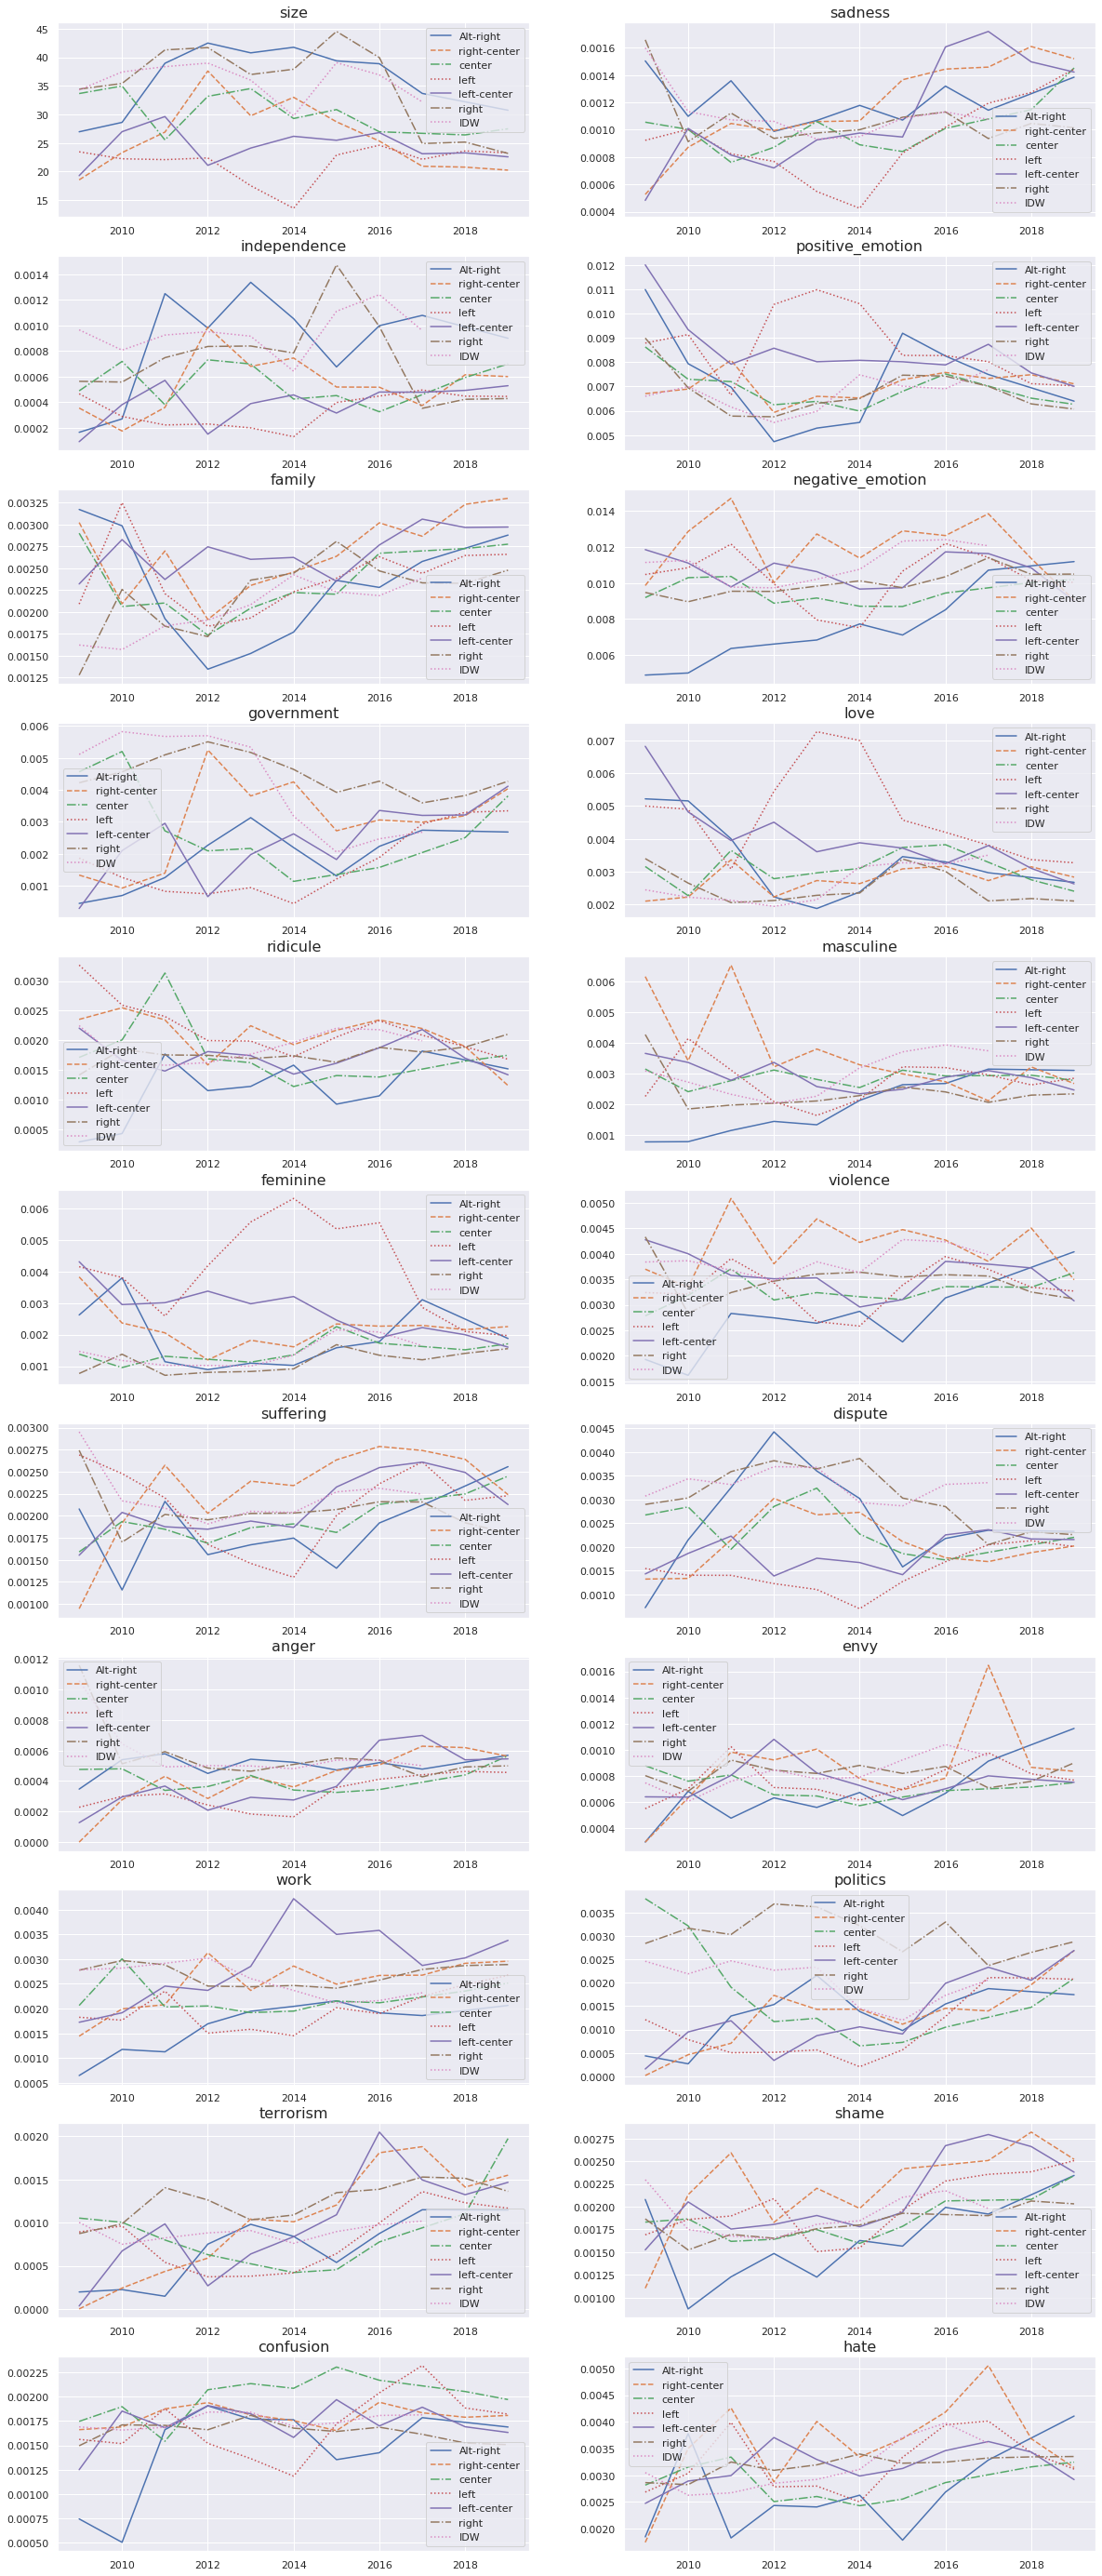

In [27]:
fig, ax = plt.subplots(11, 2, figsize=[20, 50],  squeeze=False)
c=0
for emotion in emotion_list:
    ax[c//2, c%2].set_title(emotion, fontsize=16)
    for i in range(len(names)):
        ax[c//2, c%2].plot(empath[i]["year"][2:], empath[i][emotion][2:], lines[i])
    ax[c//2, c%2].legend(names)
    c+=1
plt.savefig("./empath/plots.png")

In [ ]:
fig, ax = plt.subplots(4, 4, figsize=[20, 10],  squeeze=False)
fig.tight_layout()
plt.subplots_adjust(bottom=-0.5)
space = ' '
plt.suptitle(f"Polarity {70*space} Subjetivity", fontsize=20, y=1.05)
for i in range(len(pol)):
    ax[i//2, i%2].set_title(f"Polarity of {names[i]}", fontsize=16)
    ax[i//2, i%2].plot(pol[i].x, pol[i].y, 'or')
    ax[i//2, i%2].plot(pol[i].x, pol[i].y, '-', color='gray')

    ax[i//2, i%2].fill_between(pol[i].x, pol[i].dyd, pol[i].dyu,
                     color='gray', alpha=0.2)
    
for i in range(len(subj)):
    ax[i//2, 2+i%2].set_title(f"Subjetivity of {names[i]}", fontsize=16)
    ax[i//2, 2+i%2].plot(subj[i].x, subj[i].y, 'or')
    ax[i//2, 2+i%2].plot(subj[i].x, subj[i].y, '-', color='gray')

    ax[i//2, 2+i%2].fill_between(subj[i].x, subj[i].dyd, subj[i].dyu,
                     color='gray', alpha=0.2)

# Perspective

In [12]:
attributes = ['TOXICITY', 'SEVERE_TOXICITY', 'IDENTITY_ATTACK', 'INSULT',
             'PROFANITY', 'THREAT', 'SEXUALLY_EXPLICIT',  'FLIRTATION']

In [16]:
 with open(f"./perspective/Alt-right_perspective_2016", "rb") as fp:
    y1 = pickle.load(fp)

In [32]:
y = []
x = np.array(y1)
for i in x:
    y.append(np.array(i))

In [57]:
y = []
for i in y1:
    if len(i)==0:
        continue
    y.append(np.array([*i]))

In [58]:
np.array(y)

array([[0.10651929, 0.07883706, 0.13248183, ..., 0.17238827, 0.18769313,
        0.46582308],
       [0.06690733, 0.02674893, 0.06136566, ..., 0.12053915, 0.09972169,
        0.34630835],
       [0.07028272, 0.02458049, 0.06073306, ..., 0.07670948, 0.08766997,
        0.39009285],
       ...,
       [0.07457456, 0.04200802, 0.05357122, ..., 0.10048365, 0.04578733,
        0.40730232],
       [0.04616061, 0.01509467, 0.04444915, ..., 0.07916207, 0.0236505 ,
        0.16272256],
       [0.54392356, 0.35974246, 0.71700734, ..., 0.5576508 , 0.13449879,
        0.3796219 ]])

In [55]:
shapes = []
for i in y:
    if i.shape not in shapes:
        shapes.append(i.shape)
shapes

[(8,), (0,)]

In [41]:
np.asarray([*y1]).reshape(29296, len(attributes))

ValueError: cannot reshape array of size 29296 into shape (29296,8)

In [70]:
#print(name)
x = []
y = []
for year in range(2010, 2020):
    try:
        with open(f"./perspective/Alt-right_perspective_{year}", "rb") as fp:
            y1 = pickle.load(fp)
            x.append(year)

        y = []
        y2 = []
        for i in y1:
            if len(i)==0:
                continue
            y2.append(np.array([*i]))
        y.append(np.array(y2).mean(axis=0))
    except:
        continue

y=np.array(y)

In [71]:
y

array([[0.40262532, 0.27027786, 0.38644461, 0.35278614, 0.29827678,
        0.28542624, 0.20187407, 0.35282938]])

In [79]:
names = ["Alt-right", "right-center", "left-center", "right", "IDW"]

for name in names:
    
    print(name)
    x = []
    y = []
    for year in range(2010, 2020):
        try:
            with open(f"./perspective/{name}_perspective_{year}", "rb") as fp:
                y1 = pickle.load(fp)
                x.append(year)
        
            y2 = []
            for i in y1:
                if len(i)==0:
                    continue
                y2.append(np.array([*i]))
            if len(y2)==0:
                print()
            y.append(np.array(y2).mean(axis=0))
        except:
            continue
            
    y=np.array(y)

    dyu = []
    dyd = []
    print(y.shape)
    #for i in y:
    #    y_mean.append(y.mean(axis=0))
        #boot = bootstrap(i)
        #c = boot(.95)
        #print(c)
        #dyd.append(c[0])
        #dyu.append(c[1])
    d={}
    
    for i in range(len(attributes)):
        d[attributes[i]] = []
    d["year"] = x
    for j in range(len(y)):
        for i in range(len(attributes)):
            d[attributes[i]].append(y[j, i])
    df = pd.DataFrame(d)
    df.to_csv(f"./perspective/{name}.csv")

Alt-right
(10, 8)
right-center
(10, 8)
left-center
(10, 8)
right
(10, 8)
IDW
(10, 8)


In [78]:
df.to_csv(f"./perspective/{name}.csv")

In [81]:
names = ["Alt-right", "right-center", "left-center", "right", "IDW"]
perspective = []
for name in names:
    perspective.append(pd.read_csv(f"./perspective/{name}.csv"))
   

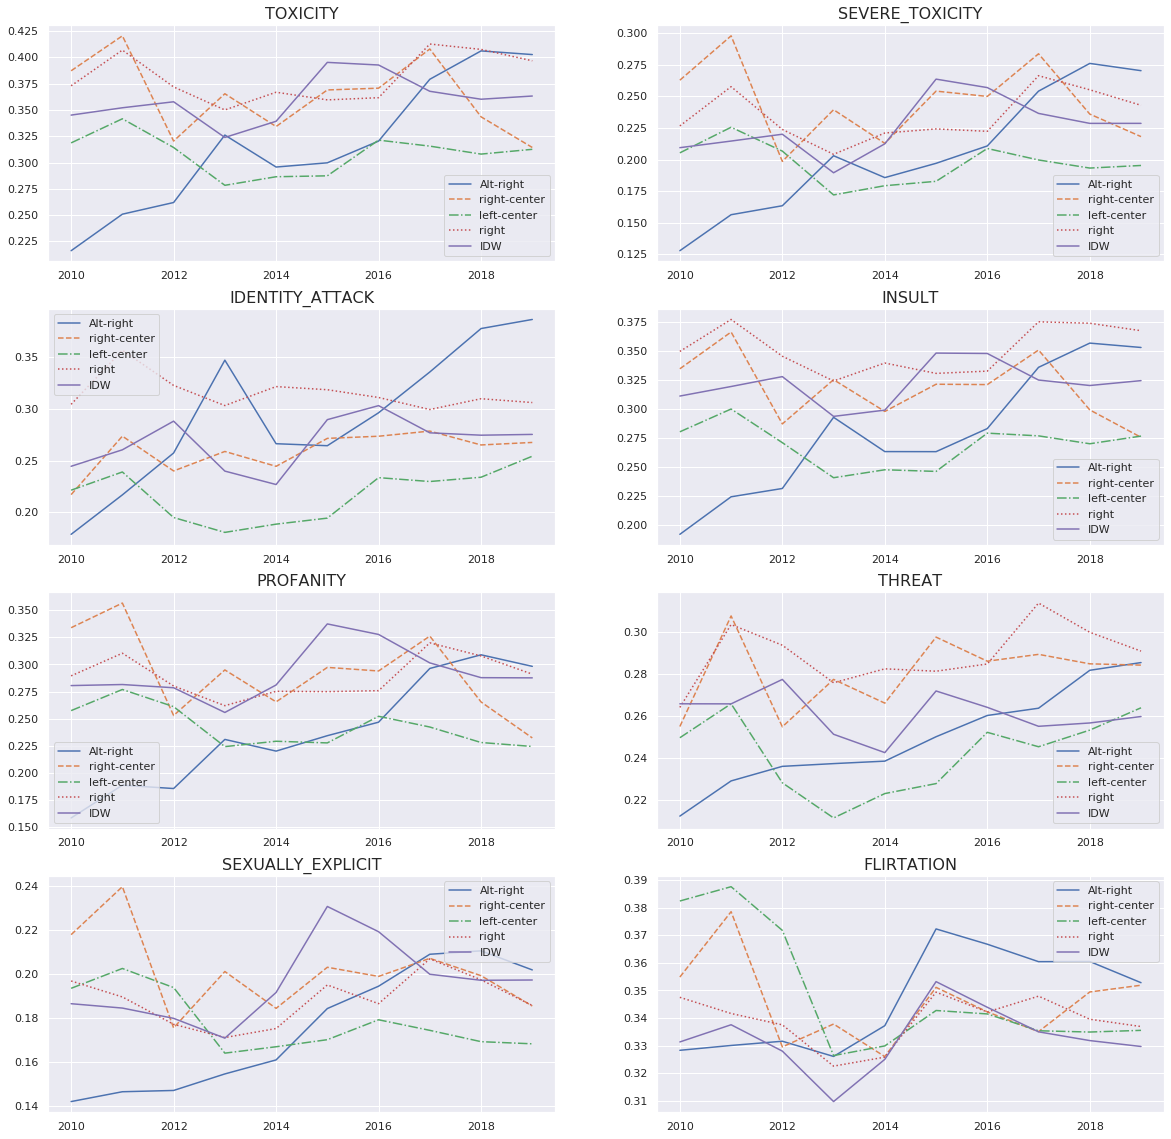

In [84]:
fig, ax = plt.subplots(4, 2, figsize=[20, 20],  squeeze=False)
c=0
for emotion in attributes:
    ax[c//2, c%2].set_title(emotion, fontsize=16)
    for i in range(len(names)):
        ax[c//2, c%2].plot(perspective[i]["year"], perspective[i][emotion], lines[i])
    ax[c//2, c%2].legend(names)
    c+=1
plt.savefig("./empath/plots.png")